<a href="https://colab.research.google.com/github/amandaswens/DSPS_ASwenson/blob/main/HW5/HW5_hacking_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u


%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Derive empirically the value of $\pi$ knwoing that the ratio of the area of the square and the inscribed circle is π / 4.



In [ ]:
def square(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')


In [ ]:
def circle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')


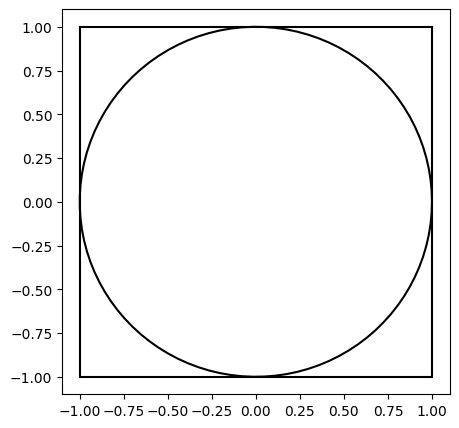

In [ ]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)

In [ ]:
# define a function that determins if a random point in the square is inside or outside of the circle
def isin(x, y, l):
  center_x, center_y = 1/2, 1/2
  radius = 1/2
  distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
  return distance <= radius

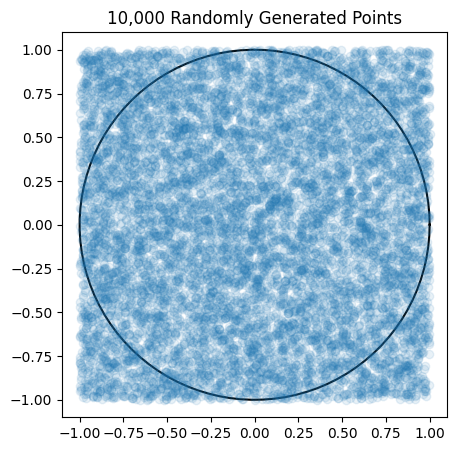

In [ ]:
# draw a bunch coordinates (x,y) inside the suqre. how many?
# remember what to do before starting the random calls
l = 1.0
np.random.seed(42)
n_points = 10000
x = np.random.uniform(-l, l, n_points)
y = np.random.uniform(-l, l, n_points)

fig, ax = plt.subplots(figsize=(5, 5))
circle(1, ax=ax)
plt.plot(x, y, 'o', alpha=0.1)
ax.set_aspect('equal')
plt.title('10,000 Randomly Generated Points')
plt.show()

**CAPTION**: Above is a plot that displays 10,000 randomly generated points within a square of side length 2, ranging from -1 to 1 on both the x and y axes, with a circle inscribed to approximate π.

In [ ]:
# what is the ratio of points in and out of the circle? can you get to pi from it
inside = x**2 + y**2 <= 1**2

n_inside = np.sum(inside)
n_outside = n_points - n_inside

ratio_inside = n_inside / n_points
ratio_outside = n_outside / n_points

pi_approx = 4 * ratio_inside

print(f"Points inside: {n_inside}")
print(f"Points outside: {n_outside}")
print(f"Ratio inside: {ratio_inside:.6f}")
print(f"Ratio outside: {ratio_outside:.6f}")
print(f"Approximated π: {pi_approx:.6f}")


Points inside: 7830
Points outside: 2170
Ratio inside: 0.783000
Ratio outside: 0.217000
Approximated π: 3.132000


**CONCLUSION**: All in all, based on my output, you can totally deduce pi from the ratio of points in and out of the circle. My approximated value was: 3.132000, and given that pi is ~3.14159, I would say the estimate is pretty spot on.
